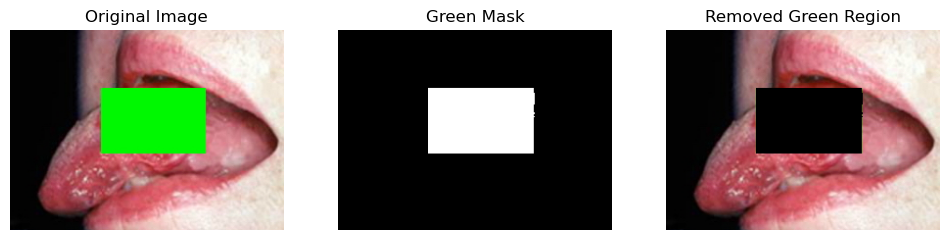

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('checkGreenRegion.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB

# Define the green color range in HSV
lower_green = np.array([35, 50, 50])  # Lower bound for green in HSV
upper_green = np.array([85, 255, 255])  # Upper bound for green in HSV

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Create a mask for the green regions
mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Invert the mask to get the non-green regions
mask_inv = cv2.bitwise_not(mask)

# Extract the non-green regions from the original image
result_image = cv2.bitwise_and(image, image, mask=mask_inv)

# Convert the mask to RGB for displaying
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
result_image = cv2.bitwise_and(image, image, mask=mask_inv)
# Display the original image, mask, and result image
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(mask_rgb)
plt.axis('off')
plt.title('Green Mask')

plt.subplot(1, 3, 3)
plt.imshow(result_image)
plt.axis('off')
plt.title('Removed Green Region')

plt.show()



In [4]:
import tensorflow as tf
tensor_image = tf.convert_to_tensor(result_image, dtype=tf.float32)
tensor_image = tf.image.resize(tensor_image, [224, 224])  # Resize to a common input size for models like ResNet
tensor_image = tf.keras.applications.resnet.preprocess_input(tensor_image)  # Preprocess as per ResNet requirements
